In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1, minNeighbors = 5):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()          

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              

    return (img_copy, faces)

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


-------

1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

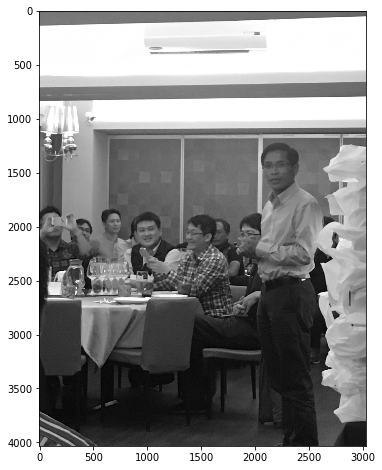

In [4]:
#load test iamge
test5 = cv2.imread('../data/opencv/test5.jpg')
#convert the test image to gray image as opencv face detector expects gray images 
gray_img = cv2.cvtColor(test5, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (8, 8))
plt.imshow(gray_img, cmap='gray')  
 
# or display the gray image using OpenCV 
# cv2.imshow('Test Imag', gray_img) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows()

2. load cascade classifier training file for haarcascade 

Faces found: 4
	x=2027,y=1305,w=316,h=316
	x=342,y=1968,w=156,h=156
	x=627,y=1886,w=157,h=157
	x=874,y=1934,w=240,h=240


<Figure size 432x288 with 0 Axes>

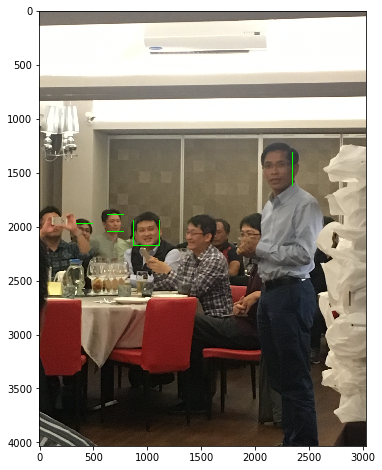

In [5]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('../data/opencv/haarcascade_frontalface_alt.xml')

#call our function to detect faces 
(faces_detected_img, faces) = detect_faces(haar_face_cascade, test5, scaleFactor = 1.1, minNeighbors = 5)  
 
print(f'Faces found: {len(faces)}')
for (i, (x,y,w,h)) in enumerate(faces):
    print(f"\tx={x},y={y},w={w},h={h}")
    
#convert image to RGB and show image 
plt.clf()
plt.figure(figsize = (8, 8))
plt.imshow(convertToRGB(faces_detected_img))

3. load cascade classifier training file for lbpcascade 

Faces found: 5
	x=2022,y=1304,w=322,h=322
	x=1574,y=2281,w=59,h=59
	x=2719,y=2605,w=62,h=62
	x=879,y=1935,w=235,h=235
	x=623,y=1886,w=159,h=159


<Figure size 432x288 with 0 Axes>

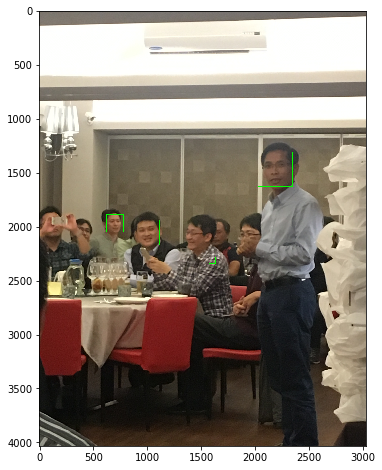

In [6]:
#load cascade classifier training file for haarcascade 
lbp_face_cascade = cv2.CascadeClassifier('../data/opencv/lbpcascade_frontalface.xml')
#call our function to detect faces 
(faces_detected_img, faces) = detect_faces(lbp_face_cascade, test5)  
 
print(f'Faces found: {len(faces)}')
for (i, (x,y,w,h)) in enumerate(faces):
    print(f"\tx={x},y={y},w={w},h={h}")

#convert image to RGB and show image 
plt.clf()
plt.figure(figsize = (8, 8))
plt.imshow(convertToRGB(faces_detected_img))